In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scipy
import scipy.stats as ss

# obtain the data: this should be changed to be statscraping
import mlbstatscraping as mss



In [2]:
# set up the parameters
analysis_year         = 2026 # what year are we projecting?
savedate              = '010826' # arbitrary tag for saving files
nclusters             = 12 # how many archetypes are there?
weight_distribution   = [0.5, 0.3, 0.13, 0.07] # how much do the past four years contribute?
regression_factor     = 0.8 # how much regression to the mean?
err_regression_factor = 1.5 # how much uncertainty in the regression to the mean?

year_weights = dict()
for year in range(analysis_year-1,analysis_year-5,-1):
    year_weights[year] = weight_distribution[analysis_year-year-1]



In [3]:


years = range(analysis_year-4,analysis_year)
for year in years:
    PitchingDF = mss.get_fangraphs_data('pitching',[year])
    PitchingDF.to_csv('data/AllPitching_{}.csv'.format(year),index=False)
    lastyeardf = PitchingDF
    if year == analysis_year-4:
        df = PitchingDF
    else:
        df = pd.concat([df,PitchingDF])



In [4]:


# add optional age adjustments
import src.ageregression as ageregression
year_weights_penalty, age_penalty_slope, age_pivot = ageregression.return_age_factors()


# set up saves predictions 2023
#http://www.espn.com/fantasy/baseball/flb/story?page=REcloserorgchart

closers = [b'Felix Bautista',b'Kenley Jansen',b'Clay Holmes',b'Pete Fairbanks',b'Jordan Romano',\
          b'Kendall Graveman',b'Emmanuel Clase',b'Alex Lange',b'Scott Barlow',b'Jorge Lopez',\
          b'Ryan Pressly',b'Carlos Estevez',b'Trevor May',b'Paul Sewald',b'Jose Leclerc',\
          b'Raisel Iglesias',b'Dylan Floro',b'Edwin Diaz',b'Seranthony Dominguez',b'Kyle Finnegan',\
          b'Brad Boxberger',b'Alexis Diaz',b'Devin Williams',b'David Bednar',b'Ryan Helsley',\
          b'Mark Melancon',b'Daniel Bard',b'Evan Phillips',b'Josh Hader',b'Camilo Doval']

next_up = [b'Cionel Perez',b'Chris Martin',b'Jonathan Loaisiga',b'Jason Adam',b'Erik Swanson',\
          b'Aaron Bummer',b'James Karinchak',b'Jose Cisnero',b'Aroldis Chapman',b'Jhoan Duran',\
          b'Rafael Montero',b'Jimmy Herget',b'Zach Jackson',b'Andres Munoz',b'Johnathan Hernandez',\
          b'Joe Jimenez',b'Tanner Scott',b'David Robertson',b'Craig Kimbrel',b'Carl Edwards Jr.',\
          b'Brandon Hughes',b'Lucas Sims',b'Matt Bush',b'Wil Crowe',b'Giovanny Gallegos',\
          b'Kevin Ginkel',b'Pierce Johnson',b'Daniel Hudson',b'Robert Suarez',b'Taylor Rogers',\
          ]

tweaks = [b'Josh Hader',b'Dellin Betances',b'Zach Britton']

closers = [b'Paul Sewald',b'Raisel Iglesias',b'Craig Kimbrel',b'Kenley Jansen',b'Adbert Alzolay',b'John Brebbia',b'Alexis Diaz',b'Emmanuel Clase',b'Justin Lawrence',b'Alex Lange',b'Josh Hader',b'Will Smith',b'James McArthur',b'John McMillon',b'John Schreiber',b'Carlos Estevez',b'Robert Stephenson',b'Evan Phillips',b'Tanner Scott',b'Devin Williams',b'Jhoan Duran',b'Edwin Diaz',b'Clay Holmes',b'Mason Miller',b'Lucas Erceg',b'Trevor Gott',b'Dany Jimenez',b'Jose Alvarado',b'Jeff Hoffman',b'David Bednar',b'Ryan Helsley',b'Robert Suarez',b'Camilo Doval',b'Andres Munoz',b'Pete Fairbanks',b'Jose Leclerc',b'David Robertson',b'Jordan Romano',b'Kyle Finnegan',b'Hunter Harvey']
next_up = [b'Kevin Ginkel',b'Miguel Castro',b'A.J. Minter',b'Pierce Johnson',b'Yennier Cano',b'Danny Coulombe',b'Chris Martin',b'Josh Winckowski',b'Hector Neris',b'Julian Merryweather',b'Jesse Chavez',b'Bryan Shaw',b'Emilio Pagan',b'Lucas Sims',b'Scott Barlow',b'Trevor Stephan',b'Tyler Kinley',b'Daniel Bard',b'Jason Foley',b'Andrew Chafin',b'Ryan Pressly',b'Bryan Abreu',b'Matt Moore',b'Brusdar Graterol',b'Joe Kelly',b'Andrew Nardi',b'AJ Puk',b'Joel Payamps',b'Trevor Megill',b'Griffin Jax',b'Brock Stewart',b'Addam Ottavino',b'Drew Smith',b'Tommy Kahnle',b'Jonathan Loaisiga',b'Gregory Soto',b'Aroldis Chapman',b'Colin Holderman',b'Giovanny Gallegos',b'JoJo Romero',b'Yuki Matsui',b'Enyel De Los Santos',b'Tyler Rogers',b'Taylor Rogers',b'Matt Brash',b'Gregory Santos',b'Jason Adam',b'Colin Poche',b'Josh Sborz',b'Erik Swanson',b'Tim Mayza',b'Tanner Rainey']
tweaks = []

closers = []
next_up = []
tweaks = []


In [5]:


# use 12 clusters
import src.makeclusters as makeclusters
year_df,stereotype_df,dfnew,hitter_cluster_centroid_df = makeclusters.create_pitching_clusters(df,nclusters,years,savedir='predictions/2026/')





/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mpetersen/FantasyBaseball/mlb-player-predictions/src/makeclusters.py:244: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  idx = short_hitter_df.groupby(['Clusters'])['Centroid Diff'].transform(min) == short_hitter_df['Centroid Diff']


In [6]:
# now we need a pitching projection
import src.totalbattersfaced as totalbattersfaced
IPDict1 = totalbattersfaced.get_ip_predictions(np.array(dfnew['Name'].values),lastyeardf)

In [7]:
IPDict1['Aaron Civale']

102.0

In [8]:
dfnew.keys()

Index(['#', 'Name', 'Team', 'W', 'L', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV',
       'HLD', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP',
       'WP', 'BK', 'SO', 'Year', 'HR.Normalize', 'ER.Normalize',
       'BB.Normalize', 'H.Normalize', 'SO.Normalize', 'Clusters',
       'Value Cluster'],
      dtype='object')

In [9]:

# make a threshold that only gives starters
import src.projectplayers as projectplayers

pls = np.unique(np.array(list(df['Name'])))

minG = 5
pls1 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2025))])))
pls2 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2024))])))
pls3 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2023))])))
pls4 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2022))])))

"""
# select closers
minG = 1
pls1 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2025))])))
pls2 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2024))])))
pls3 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2023))])))
pls4 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2022))])))
"""

pls = np.unique(np.concatenate([pls1,pls2,pls3,pls4]))


In [10]:
print(pls)

['AJ Smith-Shawver' 'Aaron Ashby' 'Aaron Civale' 'Aaron Nola'
 'Aaron Sanchez' 'Adam Mazur' 'Adam Oller' 'Adam Wainwright'
 'Adrian Houser' 'Adrian Martinez' 'Adrian Sampson' 'Albert Suarez'
 'Alec Marsh' 'Alek Manoah' 'Alex Cobb' 'Alex Faedo' 'Alex Wood'
 'Allan Winans' 'Andre Jackson' 'Andre Pallante' 'Andrew Abbott'
 'Andrew Heaney' 'Anibal Sanchez' 'Anthony DeSclafani' 'Antonio Senzatela'
 'Austin Gomber' 'Austin Pruitt' 'Austin Voth' 'Bailey Falter'
 'Bailey Ober' 'Beau Brieske' 'Ben Brown' 'Ben Lively' 'Blake Snell'
 'Bobby Miller' 'Bowden Francis' 'Brad Keller' 'Brad Lord'
 'Bradley Blalock' 'Brady Singer' 'Brandon Bielak' 'Brandon Pfaadt'
 'Brandon Walter' 'Brandon Williamson' 'Brandon Woodruff' 'Brandon Young'
 'Braxton Ashcraft' 'Braxton Garrett' 'Brayan Bello' 'Brennan Bernardino'
 'Bruce Zimmermann' 'Bryan Hoeing' 'Bryan Woo' 'Bryce Elder'
 'Bryce Miller' 'Bryse Wilson' 'Cade Cavalli' 'Cade Horton' 'Cade Povich'
 'Cal Quantrill' 'Caleb Ferguson' 'Cameron Schlittler' 'Carlos

In [24]:


IPDict = dict()
for pl in pls:
    try:
        IPDict[pl] = float(IPDict1[pl])
    except:
        IPDict[pl] = 25.



IPDict = dict()
IPDF = mss.get_fantasypros_projections('pitchers',preseason=True)
for pl in pls:
    try:
        IPDict[pl] = float(IPDF['IP'][IPDF['Player']==(pl+' ')].values[0])
    except:
        print('Failed for {}'.format(pl))
        IPDict[pl] = 25.




Failed for Aaron Sanchez
Failed for Adam Oller
Failed for Adam Wainwright
Failed for Adrian Martinez
Failed for Adrian Sampson
Failed for Alec Marsh
Failed for Alex Faedo
Failed for Alex Wood
Failed for Allan Winans
Failed for Andre Jackson
Failed for Andrew Heaney
Failed for Anibal Sanchez
Failed for Anthony DeSclafani
Failed for Austin Pruitt
Failed for Austin Voth
Failed for Ben Lively
Failed for Brandon Bielak
Failed for Brandon Walter
Failed for Bruce Zimmermann
Failed for Bryse Wilson
Failed for Cameron Schlittler
Failed for Carlos Carrasco
Failed for Carson Fulmer
Failed for Carson Spiers
Failed for Chad Kuhl
Failed for Chase Anderson
Failed for Chris Archer
Failed for Chris Flexen
Failed for Clayton Kershaw
Failed for Cole Irvin
Failed for Connor Gillispie
Failed for Connor Seabold
Failed for Corey Kluber
Failed for Cory Abbott
Failed for Dakota Hudson
Failed for Dallas Keuchel
Failed for Daniel Castano
Failed for Daniel Lynch IV
Failed for Daulton Jefferies
Failed for Davis Da

In [25]:
IPDict

{'AJ Smith-Shawver': 7.4,
 'Aaron Ashby': 57.2,
 'Aaron Civale': 140.5,
 'Aaron Nola': 180.1,
 'Aaron Sanchez': 25.0,
 'Adam Mazur': 42.8,
 'Adam Oller': 25.0,
 'Adam Wainwright': 25.0,
 'Adrian Houser': 146.0,
 'Adrian Martinez': 25.0,
 'Adrian Sampson': 25.0,
 'Albert Suarez': 20.0,
 'Alec Marsh': 25.0,
 'Alek Manoah': 103.8,
 'Alex Cobb': 63.4,
 'Alex Faedo': 25.0,
 'Alex Wood': 25.0,
 'Allan Winans': 25.0,
 'Andre Jackson': 25.0,
 'Andre Pallante': 147.3,
 'Andrew Abbott': 165.8,
 'Andrew Heaney': 25.0,
 'Anibal Sanchez': 25.0,
 'Anthony DeSclafani': 25.0,
 'Antonio Senzatela': 57.0,
 'Austin Gomber': 129.6,
 'Austin Pruitt': 25.0,
 'Austin Voth': 25.0,
 'Bailey Falter': 72.9,
 'Bailey Ober': 133.8,
 'Beau Brieske': 45.1,
 'Ben Brown': 49.2,
 'Ben Lively': 25.0,
 'Blake Snell': 162.8,
 'Bobby Miller': 22.9,
 'Bowden Francis': 37.0,
 'Brad Keller': 61.1,
 'Brad Lord': 147.8,
 'Bradley Blalock': 10.0,
 'Brady Singer': 175.0,
 'Brandon Bielak': 25.0,
 'Brandon Pfaadt': 175.3,
 'Brando

In [26]:
IPDict.keys(),pls

(dict_keys(['AJ Smith-Shawver', 'Aaron Ashby', 'Aaron Civale', 'Aaron Nola', 'Aaron Sanchez', 'Adam Mazur', 'Adam Oller', 'Adam Wainwright', 'Adrian Houser', 'Adrian Martinez', 'Adrian Sampson', 'Albert Suarez', 'Alec Marsh', 'Alek Manoah', 'Alex Cobb', 'Alex Faedo', 'Alex Wood', 'Allan Winans', 'Andre Jackson', 'Andre Pallante', 'Andrew Abbott', 'Andrew Heaney', 'Anibal Sanchez', 'Anthony DeSclafani', 'Antonio Senzatela', 'Austin Gomber', 'Austin Pruitt', 'Austin Voth', 'Bailey Falter', 'Bailey Ober', 'Beau Brieske', 'Ben Brown', 'Ben Lively', 'Blake Snell', 'Bobby Miller', 'Bowden Francis', 'Brad Keller', 'Brad Lord', 'Bradley Blalock', 'Brady Singer', 'Brandon Bielak', 'Brandon Pfaadt', 'Brandon Walter', 'Brandon Williamson', 'Brandon Woodruff', 'Brandon Young', 'Braxton Ashcraft', 'Braxton Garrett', 'Brayan Bello', 'Brennan Bernardino', 'Bruce Zimmermann', 'Bryan Hoeing', 'Bryan Woo', 'Bryce Elder', 'Bryce Miller', 'Bryse Wilson', 'Cade Cavalli', 'Cade Horton', 'Cade Povich', 'Cal 

In [27]:

print('Projecting {} players'.format(pls.size))

printfile = 'predictions/2026/pitcher_predictions'+savedate+'.dat'

ShouldProject = projectplayers.predict_pitchers(pls,years,printfile,dict(),IPDict,dfnew,hitter_cluster_centroid_df,year_weights,year_weights_penalty,regression_factor,err_regression_factor,age_penalty_slope,age_pivot)
print(ShouldProject)





Projecting 425 players
[]


In [28]:
print(pl,year)
list(dfnew['Value Cluster'][(dfnew['Name']==pl) & (dfnew['Year']==year) ])[0]

Zebby Matthews 2025


5.0

In [29]:
df = dfnew

In [30]:
ShouldProject = []


# rip these guys
skiplist = ['Jose Fernandez','Yordano Ventura']

fantasy_stats = ['HR', 'ER', 'BB', 'H', 'SO']

f = open(printfile,'w')

for pl in pls:
    #print(pl)
    pstats = np.zeros(5)
    perr = np.zeros(5)
    pskew = np.zeros(5)
    tbf = 0.
    yrsum = 0.
    yrsum_denom = 0.
    nyrs = 0.
    ip_s = 0.

    if pl in skiplist:
        continue

    # match to IP predictions
    try:
        #ip = ST['ip'][namelist==pl][0]
        ip = IPDict[pl]#df['IP'][(df['Year']==2021.0) & (df['Name']==pl)].values[0]
    except:
        pass
        #print(pl)
        ip = 5.
    #print(ip_s)
    #print('Found {}IP for {}'.format(ip,pl))

    try:
        age = float(AgeDict[pl])
    except:
        #pass
        #print('No age for', pl)
        # default to no penalties
        age = 25.0

    #for year in [2017.0,2018.0,2019.0,2020.0]:

    for yrin in years:

        year = int(yrin)
        #print(year)
        #print(df['Value Cluster'][(df['Name']==pl) & (df['Year']==year) ])
        try:
            v = list(df['Value Cluster'][(df['Name']==pl) & (df['Year']==year) ])[0]
            #print(v)
            tbf += list(df['TBF'][(df['Name']==pl) & (df['Year']==year) ])[0]
            ip_s += list(df['IP'][(df['Name']==pl) & (df['Year']==year) ])[0]
            #print(tbf,ip)
            #print(v)
            #print(v.values())
            for indx,stat in enumerate(fantasy_stats):

                statcen = list(hitter_cluster_centroid_df['{0}.Centroid'.format(stat)]\
                        [hitter_cluster_centroid_df['Value Cluster']==v])[0]
                statnorm = list(df['{0}.Normalize'.format(stat)][(df['Name']==pl) & (df['Year']==year) ])[0]
                #print(statnorm-statcen)


                # 0.5 is the regression factor for the difference
                pstats[indx] += year_weights[year] * ( regression_factor*(statnorm-statcen) + statcen)
                perr[indx] += year_weights[year] * ( err_regression_factor*(statnorm-statcen))
                pskew[indx] += year_weights[year] * np.sqrt(err_regression_factor)*((statnorm-statcen)*(statnorm-statcen))
            yrsum += year_weights[year]
            yrsum_denom += year_weights[year]

            # apply an age penalty
            #                  0.1          * (33 - 33)        + (-1)
            #age_penalty = age_penalty_slope * ((age-age_pivot) + (year-2018.))


            #yrsum -= np.max([age_penalty,0.0])
            nyrs += 1.
            #stereotype_df['{0}.Normalize'.format(stat)] = stereotype_df['{0}.Normalize'.format(stat)] - stereotype_df['{0}.Normalize'.format(stat)] % 1
        except:
            #yrsum += year_weights_penalty[year]
            #print('failed year for {}: {}'.format(pl,year))
            yrsum_denom += year_weights_penalty[year]
            age_penalty = age_penalty_slope * ((age-age_pivot) + (year-2018.))
            yrsum -= np.max([age_penalty,0.0])
        #print('Running yrsum for {}: {}, {}'.format(pl,year,yrsum))

    if nyrs < 0.5: nyrs=1000.

    adj_fac = 1.#ip/ip_s
    #print(adj_fac)

    #print(pl,nyrs,yrsum)

    if yrsum <0.1:
        #print(pl)
        yrsum = 0.1
        yrsum_denom = 0.15

    if (yrsum_denom <0.) & (ip>25):
        ShouldProject.append(pl)
        continue

    if ip > 25:

        print(pl,end=', ',file=f)
        for indx,p in enumerate(pstats):
            print(int(adj_fac*np.abs(np.round((p*ip/(100.))/yrsum,2))),end=', ',file=f)
            print(int(adj_fac*np.abs(np.round((perr[indx]*ip/(100.))/yrsum,2))),end=', ',file=f)
            print(pskew[indx] - (perr[indx]*perr[indx]),end=', ',file=f)

        print(int(adj_fac*np.abs(np.round((tbf/(nyrs))*yrsum_denom,2))),end=', ',file=f)
        print(int(np.abs(np.round((ip_s/(nyrs))*yrsum_denom,2))),end=', ',file=f)
        print(int(ip),end=', ',file=f)
        print(yrsum/yrsum_denom,end=', ',file=f)



        #print(int(np.abs(np.round((tbf/(nyrs))*yrsum,2))),end=', ')
        #print(int(np.abs(np.round((ip/(nyrs))*yrsum,2))),end=', ')

        print('',file=f)

    else:
        pass
    #print('Skipping projections for ',pl)


f.close()


In [31]:


# bring the data back in
A = np.genfromtxt(printfile,\
                  dtype={'names':       ("Name", "HR", "eHR","sHR",\
                                         "ER","eER","sER",\
                                         "BB", "eBB","sBB",\
                                         "H","eH","sH",\
                                         "SO","eSO","sSO",\
                                        "TBF","IPc","IP","Afac"),\
                             'formats': ('S20',  'i4',   'i4', 'f8',\
                                         'i4',  'i4', 'f8',\
                                         'i4','i4',  'f8', \
                                         'i4',  'i4', 'f8',\
                                         'i4',  'i4', 'f8',\
                                         'i4',  'i4',  'i4','f4')},\
                 delimiter=',')

print(np.nanmax(A['SO']))
print(len(A['Name']))

250
285


In [32]:
import src.pitchingmodels as pmodels
era,eera,whip,ewhip,ww,eww = pmodels.make_wins_model(A)



285


In [33]:
ww

array([ 1.54588571,  7.57549972,  9.9291573 ,  0.43367143,  8.6476636 ,
        4.53433174,  1.47091374,  8.32972219, 12.34363378,  0.76863831,
        4.23298862,  1.68941342,  7.09245519,  0.60480212,  0.76553707,
       14.02546514,  0.46049779,  1.47366467,  9.09199238, 11.21260693,
        9.21762333,  0.92053146, 12.96509174,  0.29092875, 11.52033505,
        6.55872279, 10.98219623,  1.10468407,  0.55885843, 14.23082747,
        1.12262955,  7.63003968,  8.41267326, 10.08689917,  0.40853722,
        1.82749729,  1.11863518, 11.30189265,  2.08295253,  0.6062019 ,
       10.08078695,  9.64361303,  2.20502499,  5.91244098,  3.99594086,
        0.65131081, 10.8572775 ,  4.97909056, 13.96762258,  0.83257734,
        0.45560328, 12.87675214,  2.87641751, 10.92386442,  2.01420789,
        0.39452334,  1.34293072,  0.71186063,  8.99301855, 13.80982831,
        0.8256881 ,  0.22228447,  0.68611739, 11.81323171,  9.72787892,
       10.23761268, 13.77653038,  1.3448711 ,  8.0944741 , 11.74

In [34]:

import src.rankandprint as rprint

# very first ranking
# create blank svals for first sorting
svals = np.zeros(len(ww))

totrank,valrank = rprint.make_totrank_pitching(A,era,eera,whip,ewhip,ww,svals)


fantasy_stats = ['HR', 'ER', 'BB', 'H', 'SO']
xvals = np.linspace(0.,350.,2000)
LDict,MDict,HDict = rprint.make_mid_min_max(A,totrank,fantasy_stats,xvals,simple=True)


In [35]:
svals,esvals = pmodels.make_saves(A,totrank,closers,next_up,tweaks)

# rerank with Saves
# and weight categories again
# [ip,so,era,whip,w,svals]
weights = [1.0,2.0,1.0,1.0,0.5,1.0]
weights = [1.0,2.0,0.5,1.0,0.5,1.0] # a
weights = [1.0,2.0,1.0,1.0,0.0,1.0] # b
weights = [0.5,2.0,1.0,1.0,0.0,1.0] # c

totrank,valrank = rprint.make_totrank_pitching(A,era,eera,whip,ewhip,ww,svals,weights=weights)


printfile = 'predictions/2026/pitcher_predictions'+savedate+'.tbl'
rprint.print_html_ranks_pitching(printfile,A,totrank,LDict,MDict,HDict,era,eera,whip,ewhip,ww,eww,svals,esvals)

printfile = 'predictions/2026/pitcher_predictions_'+savedate+'.csv'
#rprint.print_csv_ranks_pitching(printfile,A,totrank,valrank,LDict,MDict,HDict,era,eera,whip,ewhip,ww,eww,svals,esvals)
rprint.print_csv_ranks_pitching(printfile,A,totrank,LDict,MDict,HDict,era,eera,whip,ewhip,ww,eww,svals,esvals)


In [36]:
import pandas as pd

In [37]:
LY = pd.read_csv('data/AllPitching_2025.csv')
TY = pd.read_csv('predictions/2026/pitcher_predictions_'+savedate+'.csv')

In [38]:
TY['Name'] = TY['Name'].str.rstrip()

In [39]:
MY = pd.merge(LY,TY,on='Name')

In [40]:
MY

,#,Name,Team,W_x,L,ERA_x,G,GS,CG,ShO,...,ERA_y,eERA,WHIP,eWHIP,W_y,eW,S,eS,Rank,Unnamed: 13
0,57.0,Erik Miller,SFG,4.0,1.0,1.50,36.0,0.0,0.0,0.0,...,2.67,2.17,1.35,0.60,1,29,0,0,179,NaN
1,62.0,Chase Silseth,LAA,0.0,0.0,1.64,10.0,0.0,0.0,0.0,...,4.89,0.98,1.37,0.29,0,4,0,0,258,NaN
2,69.0,Nathan Eovaldi,TEX,11.0,3.0,1.73,22.0,22.0,1.0,1.0,...,2.83,0.68,1.01,0.22,14,4,0,0,18,NaN
3,74.0,Trevor Rogers,BAL,9.0,3.0,1.81,18.0,18.0,1.0,0.0,...,3.23,0.58,1.18,0.18,12,4,0,0,47,NaN
4,76.0,Jose Suarez,ATL,2.0,0.0,1.86,7.0,1.0,0.0,0.0,...,6.21,1.15,1.64,0.32,0,9,0,0,276,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,755.0,Mike Clevinger,CHW,0.0,2.0,7.94,8.0,0.0,0.0,0.0,...,3.74,0.80,1.21,0.25,1,4,0,0,181,NaN
258,761.0,Roddery Munoz,STL,0.0,0.0,8.18,9.0,0.0,0.0,0.0,...,6.24,1.84,1.55,0.43,0,24,0,0,274,NaN
259,774.0,Carson Palmquist,COL,0.0,4.0,8.91,9.0,7.0,0.0,0.0,...,8.71,1.74,2.03,0.54,0,71,0,0,285,NaN
260,796.0,Joey Estes,ATH,0.0,2.0,9.82,3.0,2.0,0.0,0.0,...,5.00,1.29,1.22,0.36,0,47,0,0,261,NaN


In [41]:
MY.keys()

Index(['#', 'Name', 'Team', 'W_x', 'L', 'ERA_x', 'G', 'GS', 'CG', 'ShO', 'SV',
       'HLD', 'BS', 'IP_x', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP',
       'WP', 'BK', 'SO_x', 'Year', 'IP_y', 'SO_y', 'eSO', 'ERA_y', 'eERA',
       'WHIP', 'eWHIP', 'W_y', 'eW', 'S', 'eS', 'Rank', 'Unnamed: 13'],
      dtype='object')

Text(0, 0.5, '2026 Projected - 2025 Saves')

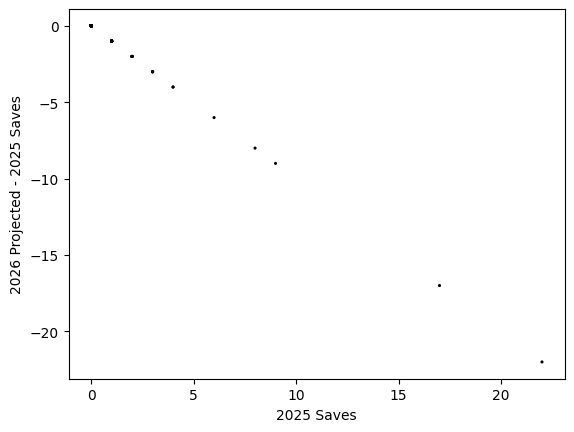

In [42]:
plt.scatter(MY['SV'],(MY['S']-MY['SV']),facecolor='black',edgecolor='none',s=5.)
plt.xlabel('2025 Saves')
plt.ylabel('2026 Projected - 2025 Saves')

Text(0, 0.5, '2026 Projected - 2025 Strikeouts')

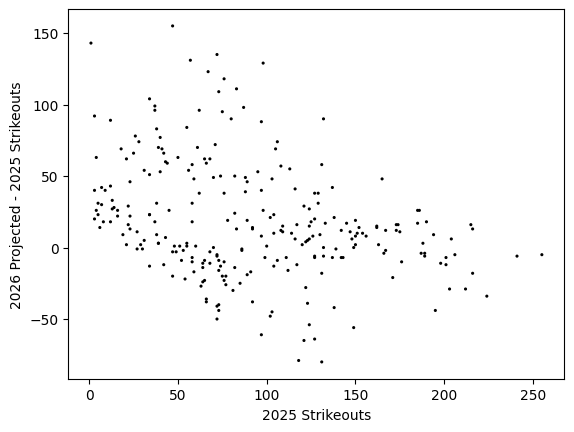

In [43]:
plt.scatter(MY['SO_x'],(MY['SO_y']-MY['SO_x']),facecolor='black',edgecolor='none',s=5.)
plt.xlabel('2025 Strikeouts')
plt.ylabel('2026 Projected - 2025 Strikeouts')

Text(0, 0.5, '2026 Projected - 2025 WHIP')

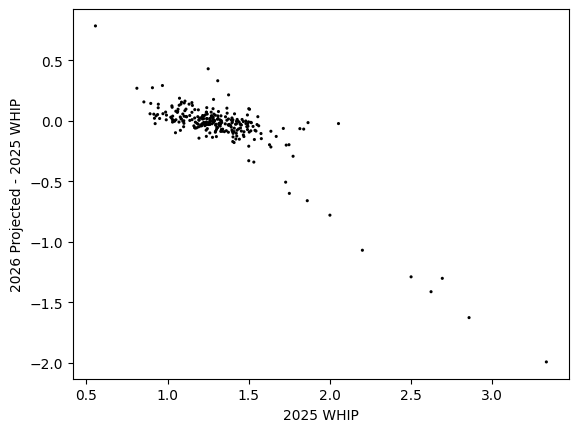

In [44]:
WHIP2 = (MY['H'] + MY['BB']) / MY['IP_x']
plt.scatter(WHIP2,(MY['WHIP']-WHIP2),facecolor='black',edgecolor='none',s=5.)
plt.xlabel('2025 WHIP')
plt.ylabel('2026 Projected - 2025 WHIP')

In [45]:
print(TY['Name'].values[0:10])

['Tarik Skubal' 'Paul Skenes' 'Garrett Crochet' 'Jacob deGrom'
 'Chris Sale' 'Hunter Greene' 'Bryan Woo' 'Brandon Woodruff'
 'Yoshinobu Yamamoto' 'Nolan McLean']


In [ ]:
'Tarik Skubal' 'Paul Skenes' 'Garrett Crochet' 'Jacob deGrom'
 'Yoshinobu Yamamoto' 'Bryan Woo' 'Freddy Peralta' 'Zack Wheeler'
 'Nick Pivetta' 'Max Fried'